In [2]:
!pip install pyreadstat
!pip install pandas
!pip install requests
!pip install seaborn
!pip install scipy
!pip install matplotlib

In [3]:
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pyreadstat
import os

In [4]:
#OPTION 1
# Download all XPT Files
# Set output folder
folder = "/content/raw"
os.makedirs(folder, exist_ok=True)

# NHANES file URLs
nhanes_urls = {
    "rawdemo": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.xpt",
    "rawbp": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.xpt",
    "rawvitd": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/VID_L.xpt",
    "rawhepb": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/HEPB_S_L.xpt",
    "rawkidney": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/KIQ_U_L.xpt",
    "rawminbehavior": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PAQ_L.xpt",
    "rawweight": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/WHQ_L.xpt",
    "rawmental": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DPQ_L.xpt"
}

# Download each file using its original filename
for url in nhanes_urls.values():
    filename = os.path.basename(url)  # Extract filename from URL
    filepath = os.path.join(folder, filename)
    print(f"Downloading {filename}...")
    response = requests.get(url)
    if response.status_code == 200:
        with open(filepath, "wb") as f:
            f.write(response.content)
        print(f"Saved to {filepath}")
    else:
        print(f"Failed to download {filename}: HTTP {response.status_code}")


Saved to /content/raw/DEMO_L.xpt
Saved to /content/raw/BPXO_L.xpt
Saved to /content/raw/VID_L.xpt
Saved to /content/raw/HEPB_S_L.xpt
Saved to /content/raw/KIQ_U_L.xpt
Saved to /content/raw/PAQ_L.xpt
Saved to /content/raw/WHQ_L.xpt
Saved to /content/raw/DPQ_L.xpt


In [5]:
#  If you have the XPT files already downloaded in the /content/raw/ folder
#  checking for xpt file that are non readable with pyreadtat because of formatting issue
folder = "/content/raw/"
for file in os.listdir(folder):
    if file.endswith(".xpt"):
        path = os.path.join(folder, file)
        try:
            df, meta = pyreadstat.read_xport(path)
            print(f"✅ Loaded: {file}")
        except Exception as e:
            print(f"❌ Failed: {file} — {e}")

❌ Failed: DEMO_L.xpt — 'utf-8' codec can't decode byte 0x92 in position 13: invalid start byte
✅ Loaded: VID_L.xpt
✅ Loaded: KIQ_U_L.xpt
✅ Loaded: WHQ_L.xpt
✅ Loaded: PAQ_L.xpt
✅ Loaded: BPXO_L.xpt
✅ Loaded: DPQ_L.xpt
✅ Loaded: HEPB_S_L.xpt


In [6]:
# attempted to use pyreadstat to read xpt file
# the  file has invalid type of formatting
# tried multiple scripts but gives me more issues.
df, meta = pyreadstat.read_xport("/content/raw/DEMO_L.xpt")
print(df.head())

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 13: invalid start byte

In [ ]:
# gave up on converting to change formatting issue in the xpt file and tried to use R instead

In [1]:
# Using R to convert xpt to csv
# Change Runtime Type to R, prior to doing the script below
# Installing haven (only needed once)
install.packages("haven")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Converting single .xpt file to .csv
library(haven)
data <- read_xpt("/content/raw/DPQ_L.xpt")
write.csv(data, "/content/raw/DPQ_L.csv", row.names = FALSE)

In [3]:
# Converting all .xpt files to .csv
# Load the library
library(haven)

# Set folder path
folder <- "/content/raw"

# List all .xpt files
xpt_files <- list.files(folder, pattern = "\\.xpt$", full.names = TRUE)

# Loop through and convert each to .csv
for (xpt_file in xpt_files) {
  # Read .xpt file
  data <- read_xpt(xpt_file)

  # Create .csv filename
  csv_file <- sub("\\.xpt$", ".csv", xpt_file)

  # Write to CSV
  write.csv(data, csv_file, row.names = FALSE)

  cat("✅ Converted:", xpt_file, "→", csv_file, "\n")
}

✅ Converted: /content/raw/BPXO_L.xpt → /content/raw/BPXO_L.csv 
✅ Converted: /content/raw/DEMO_L.xpt → /content/raw/DEMO_L.csv 
✅ Converted: /content/raw/DPQ_L.xpt → /content/raw/DPQ_L.csv 
✅ Converted: /content/raw/HEPB_S_L.xpt → /content/raw/HEPB_S_L.csv 
✅ Converted: /content/raw/KIQ_U_L.xpt → /content/raw/KIQ_U_L.csv 
✅ Converted: /content/raw/PAQ_L.xpt → /content/raw/PAQ_L.csv 
✅ Converted: /content/raw/VID_L.xpt → /content/raw/VID_L.csv 
✅ Converted: /content/raw/WHQ_L.xpt → /content/raw/WHQ_L.csv 


In [3]:
# OPTION 2
# If you are going to use the file directly from the website
# Ursing R directly converting XPT files from the weblink directly to CSV

# Install and load required package
install.packages("haven")
library(haven)

# Set output folder
folder <- "/content/raw"
dir.create(folder, showWarnings = FALSE)

# NHANES file URLs with named entries
nhanes_urls <- list(
  rawdemo = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.xpt",
  rawbp = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.xpt",
  rawvitd = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/VID_L.xpt",
  rawhepb = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/HEPB_S_L.xpt",
  rawkidney = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/KIQ_U_L.xpt",
  rawminbehavior = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PAQ_L.xpt",
  rawweight = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/WHQ_L.xpt",
  rawmental = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DPQ_L.xpt"
)

# Loop through each file, read and save as CSV using original filename
for (url in nhanes_urls) {
  data <- read_xpt(url)
  filename <- basename(url)                      # Extract filename from URL
  csv_name <- sub("\\.xpt$", ".csv", filename)   # Replace .xpt with .csv
  write.csv(data, file = file.path(folder, csv_name), row.names = FALSE)
}


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Change Runtime Type back to Python prior to scripts below
# Mapping urls
demo = pd.read_csv("/content/raw/DEMO_L.csv")
bp = pd.read_csv("/content/raw/BPXO_L.csv")
vitd = pd.read_csv("/content/raw/VID_L.csv")
hepb = pd.read_csv("/content/raw/HEPB_S_L.csv")
kidney = pd.read_csv("/content/raw/KIQ_U_L.csv")
minbehavior = pd.read_csv("/content/raw/PAQ_L.csv")
weight = pd.read_csv("/content/raw/WHQ_L.csv")
mental = pd.read_csv("/content/raw/DPQ_L.csv")

In [5]:
## Analysis 1: Chi-square test between marital status and education level
# Step 1: Select and clean relevant columns
Analysis1 = (
    demo[['DMDMARTZ', 'DMDEDUC2']]
    .query("DMDMARTZ.notna() and DMDEDUC2.notna()")
    .query("DMDMARTZ not in [77, 99] and DMDEDUC2 not in [7, 9]")
)

# Step 2: Recode categories
marital_map = {1: 'Married', 2: 'Widowed/Divorced/Separated', 3: 'Single'}
Analysis1['MaritalStatus'] = Analysis1['DMDMARTZ'].map(marital_map)

Analysis1['EducLevel'] = Analysis1['DMDEDUC2'].apply(
    lambda x: 'Bachelor or Higher' if x == 5 else 'Less than Bachelor'
)

# Step 3: Drop rows with missing recodes
filtered = Analysis1[['MaritalStatus', 'EducLevel']].dropna()

# Step 4: Contingency table and chi-square test
contingency_table = pd.crosstab(filtered['MaritalStatus'], filtered['EducLevel'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 5: Output results
print("Contingency Table:\n", contingency_table)
print(f"\nChi-square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("\n✅ Statistically significant association between marital status and education level.")
else:
    print("\n❌ No statistically significant association found.")

Contingency Table:
 EducLevel                   Bachelor or Higher  Less than Bachelor
MaritalStatus                                                     
Married                                   1631                2503
Single                                     517                1106
Widowed/Divorced/Separated                 473                1542

Chi-square Statistic: 157.97
Degrees of Freedom: 2
P-value: 0.0000

✅ Statistically significant association between marital status and education level.


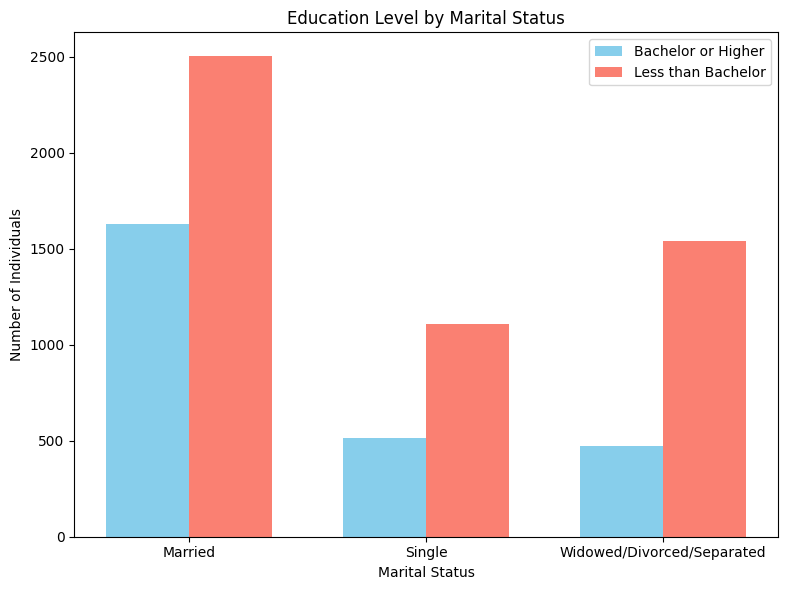

In [6]:
# Step 6: Visualization (replace with actual counts if needed)
categories = contingency_table.index.tolist()
bachelor_counts = contingency_table['Bachelor or Higher'].tolist()
less_bachelor_counts = contingency_table['Less than Bachelor'].tolist()

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, bachelor_counts, width, label='Bachelor or Higher', color='skyblue')
ax.bar(x + width/2, less_bachelor_counts, width, label='Less than Bachelor', color='salmon')

ax.set_xlabel('Marital Status')
ax.set_ylabel('Number of Individuals')
ax.set_title('Education Level by Marital Status')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
## Analysis 2: One-Way ANOVA (Analysis of Variance) between marital status and sedientary behavior time (PAD680)

# Step 1: Select and clean relevant columns
# Merge and clean
Analysis2 = pd.merge(
    demo[['SEQN', 'DMDMARTZ']],
    minbehavior[['SEQN', 'PAD680']],
    on='SEQN',
    how='inner'
)

filtered = (
    Analysis2[['DMDMARTZ', 'PAD680']]
    .query("DMDMARTZ.notna() and PAD680.notna()")
    .query("DMDMARTZ not in [77, 99] and PAD680 not in [7777, 9999]")
)
# Step2 Recode marital status
marital_map = {
    1: 'Married',
    2: 'Widowed/Divorced/Separated',
    3: 'Single'
}
filtered['MaritalStatus'] = filtered['DMDMARTZ'].map(marital_map)

# Step3 Create groups
groups = {
    status: filtered.loc[filtered['MaritalStatus'] == status, 'PAD680']
    for status in ['Married', 'Widowed/Divorced/Separated', 'Single']
}

# Step4 Run one-way ANOVA
f_stat, p_value = f_oneway(*groups.values())

# Step5 Output results
for status, group in groups.items():
    print(f"Mean PAD680 ({status}): {group.mean():.2f} minutes")

print(f"\nF-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\n✅ Statistically significant difference in mean sedentary behavior time across marital status groups.")
else:
    print("\n❌ No statistically significant difference found.")

Mean PAD680 (Married): 353.29 minutes
Mean PAD680 (Widowed/Divorced/Separated): 363.46 minutes
Mean PAD680 (Single): 382.43 minutes

F-statistic: 11.09
P-value: 0.0000

✅ Statistically significant difference in mean sedentary behavior time across marital status groups.


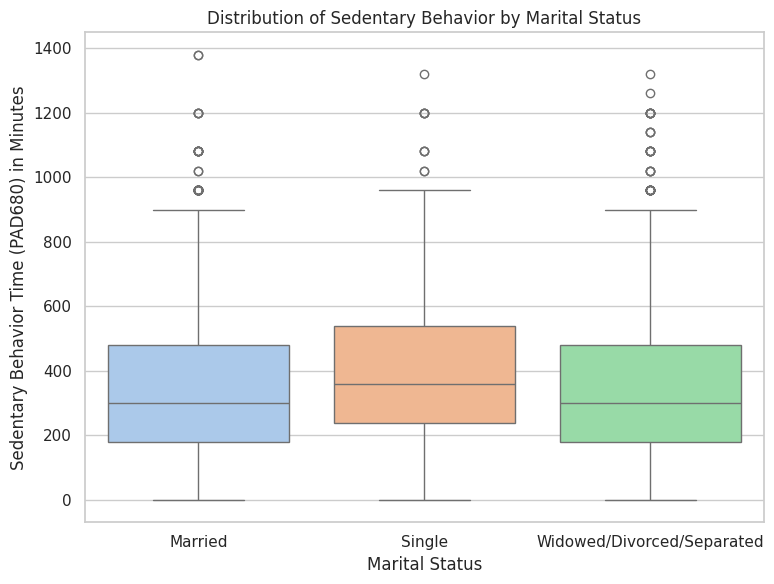

In [ ]:
# Visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(data=filtered, x='MaritalStatus', y='PAD680', hue='MaritalStatus', palette='pastel', dodge=False)
plt.legend([], [], frameon=False)  # Hide legend

plt.xlabel('Marital Status')
plt.ylabel('Sedentary Behavior Time (PAD680) in Minutes')
plt.title('Distribution of Sedentary Behavior by Marital Status')
plt.tight_layout()
plt.show()


In [ ]:
## Analysis 3: One-way ANOVA for systolic blood pressure (BPXOSY3) by marital status and age correlation
# Step 1: Load and merge relevant columns
Analysis3 = pd.merge(
    demo[['SEQN', 'RIDAGEYR', 'DMDMARTZ']],
    bp[['SEQN', 'BPXOSY3']],
    on='SEQN',
    how='inner'
)

# Step 2: Clean data
filtered = (
    Analysis3[['RIDAGEYR', 'DMDMARTZ', 'BPXOSY3']]
    .query("RIDAGEYR.notna() and DMDMARTZ.notna() and BPXOSY3.notna()")
    .query("DMDMARTZ not in [77, 99]")
)

# Step 3: Recode marital status
marital_map = {
    1: 'Married',
    2: 'Widowed/Divorced/Separated',
    3: 'Single'
}
filtered['MaritalStatus'] = filtered['DMDMARTZ'].map(marital_map)

# Step 4: Recode age group
filtered['AgeGroup'] = filtered['RIDAGEYR'].apply(lambda x: '80 and over' if x >= 80 else '0–79')

# Step 5: Create groups by marital status
groups = {
    status: filtered.loc[filtered['MaritalStatus'] == status, 'BPXOSY3']
    for status in ['Married', 'Widowed/Divorced/Separated', 'Single']
}

# Step 6: Run one-way ANOVA
f_stat, p_value = f_oneway(*groups.values())

# Step 7: Output results
for status, group in groups.items():
    print(f"Mean BPXOSY3 ({status}): {group.mean():.2f} mmHg")

print(f"\nF-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\n✅ Statistically significant difference in systolic blood pressure across marital status groups.")
else:
    print("\n❌ No statistically significant difference found.")

Mean BPXOSY3 (Married): 122.61 mmHg
Mean BPXOSY3 (Widowed/Divorced/Separated): 126.14 mmHg
Mean BPXOSY3 (Single): 118.85 mmHg

F-statistic: 52.74
P-value: 0.0000

✅ Statistically significant difference in systolic blood pressure across marital status groups.


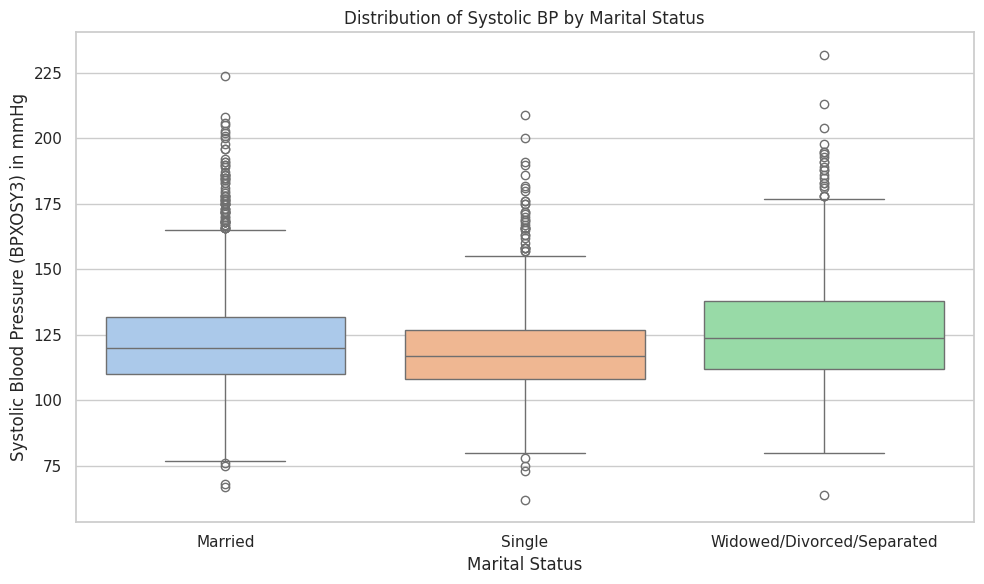

In [ ]:
# Step 8: Visualization by marital status
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=filtered, x='MaritalStatus', y='BPXOSY3', hue='MaritalStatus', palette='pastel', dodge=False)
plt.legend([], [], frameon=False)  # Hide legend

plt.xlabel('Marital Status')
plt.ylabel('Systolic Blood Pressure (BPXOSY3) in mmHg')
plt.title('Distribution of Systolic BP by Marital Status')
plt.tight_layout()
plt.show()


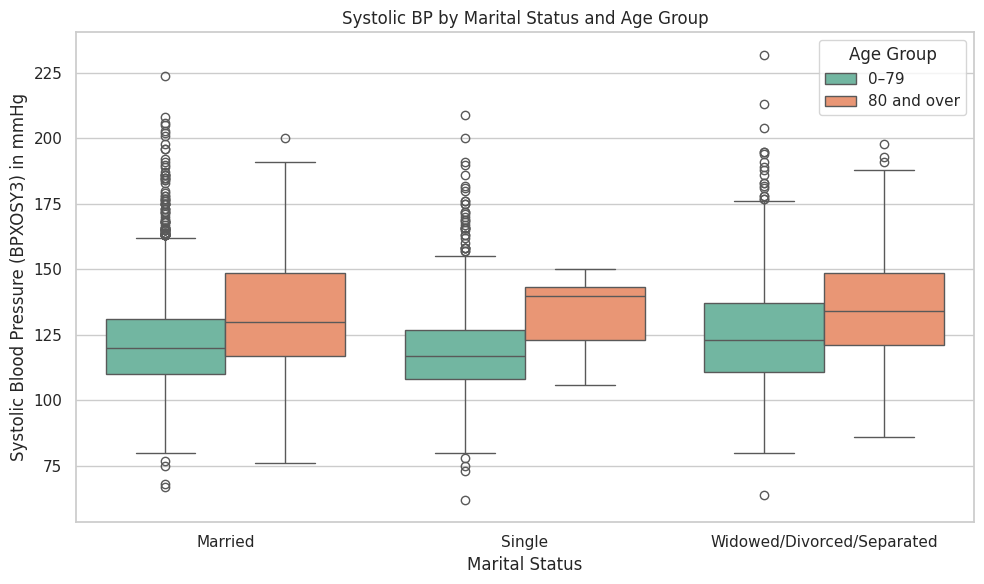

In [ ]:
# Step 9: Visualization by marital status and age group
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered, x='MaritalStatus', y='BPXOSY3', hue='AgeGroup', palette='Set2')
plt.xlabel('Marital Status')
plt.ylabel('Systolic Blood Pressure (BPXOSY3) in mmHg')
plt.title('Systolic BP by Marital Status and Age Group')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [ ]:
# Step 10: Age correlation
age_corr = filtered[['RIDAGEYR', 'BPXOSY3']].corr().iloc[0, 1]
print(f"\n📊 Correlation between Age and Systolic BP: {age_corr:.2f}")


📊 Correlation between Age and Systolic BP: 0.36


In [ ]:
## Analysis 4: Correlation for sedentary behavior time (PAD680) by weight categories
# Step 1: Load and merge relevant columns

Analysis4 = pd.merge(
    minbehavior[['SEQN', 'PAD680']],
    weight[['SEQN', 'WHD020']],
    on='SEQN',
    how='inner'
)

# Step 2: Clean data
filtered = (
    Analysis4[['PAD680', 'WHD020']]
    .query("PAD680.notna() and WHD020.notna()")
    .query("PAD680 not in [7777, 9999] and WHD020 not in [7777, 9999]")
)

# Step 3: Calculate Pearson correlation
correlation = filtered[['PAD680', 'WHD020']].corr().iloc[0, 1]
print(f"\n📊 Correlation between sedentary time and weight: {correlation:.2f}")


📊 Correlation between sedentary time and weight: 0.16


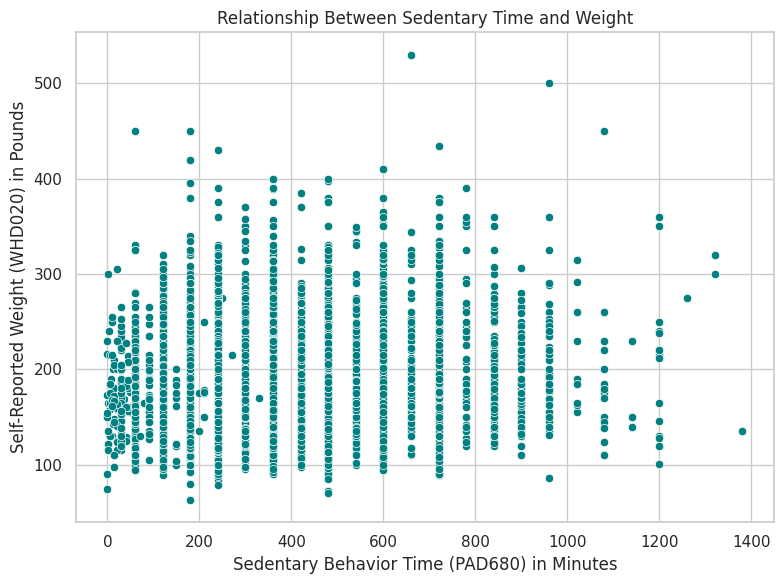

In [ ]:
# Step 4: Visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered, x='PAD680', y='WHD020', color='teal')
plt.xlabel('Sedentary Behavior Time (PAD680) in Minutes')
plt.ylabel('Self-Reported Weight (WHD020) in Pounds')
plt.title('Relationship Between Sedentary Time and Weight')
plt.tight_layout()
plt.show()

In [ ]:
#Analysis 5: Correlation between Marital Status vs Depression (DPQ020)
# Step 1: Load and merge relevant columns
Analysis5 = pd.merge(
    demo[['SEQN', 'DMDMARTZ']],
    mental[['SEQN', 'DPQ020']],
    on='SEQN',
    how='inner'
)

# Step 2: Clean data
filtered = (
    Analysis5[['DMDMARTZ', 'DPQ020']]
    .query("DMDMARTZ.notna() and DPQ020.notna()")
    .query("DMDMARTZ not in [77, 99] and DPQ020 not in [7, 9]")
)

# Step 3: Recode marital status
marital_map = {
    1: 'Married',
    2: 'Widowed/Divorced/Separated',
    3: 'Single'
}
filtered['MaritalStatus'] = filtered['DMDMARTZ'].map(marital_map)

# Step 4: Recode depression frequency
depression_map = {
    0: 'Not at all',
    1: 'Several days',
    2: 'More than half the days',
    3: 'Nearly every day'
}
filtered['DepressionLevel'] = filtered['DPQ020'].map(depression_map)

# Step 5: Create contingency table
contingency = pd.crosstab(filtered['MaritalStatus'], filtered['DepressionLevel'])

# Step 6: Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

# Step 7: Output results
print("Contingency Table:\n", contingency)
print(f"\nChi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("\n✅ Statistically significant association between marital status and depressive symptoms.")
else:
    print("\n❌ No statistically significant association found.")

Contingency Table:
 DepressionLevel             More than half the days  Nearly every day  \
MaritalStatus                                                           
Married                                         103                55   
Single                                           89                68   
Widowed/Divorced/Separated                       79                77   

DepressionLevel             Not at all  Several days  
MaritalStatus                                         
Married                           2088           597  
Single                             609           327  
Widowed/Divorced/Separated         848           318  

Chi-square statistic: 157.03
P-value: 0.0000
Degrees of freedom: 6

✅ Statistically significant association between marital status and depressive symptoms.


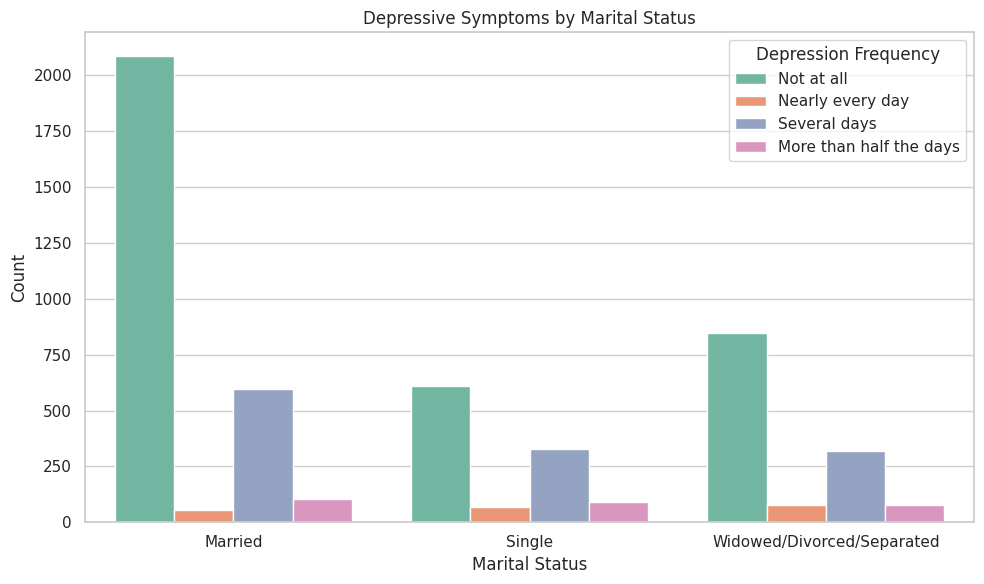

In [ ]:
# Step 8: Visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered, x='MaritalStatus', hue='DepressionLevel', palette='Set2')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Depressive Symptoms by Marital Status')
plt.legend(title='Depression Frequency')
plt.tight_layout()
plt.show()